# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

# Read Data and get an Overview

In [3]:
df_hr = pd.read_csv('Datasets/HR_comma_sep.csv')

In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Explore

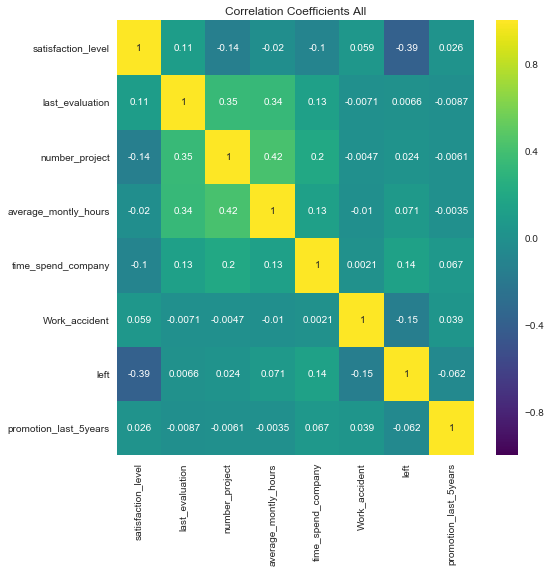

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df_hr.drop('sales', axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Coefficients All')

In [8]:
df_hr_left = df_hr[df_hr['left'] == 1]

In [9]:
df_hr_not_left = df_hr[df_hr['left'] == 0]

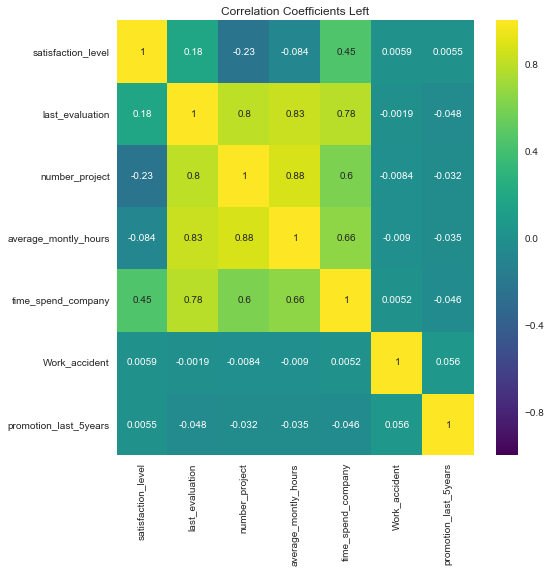

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df_hr_left.drop(['sales', 'left'], axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Coefficients Left')

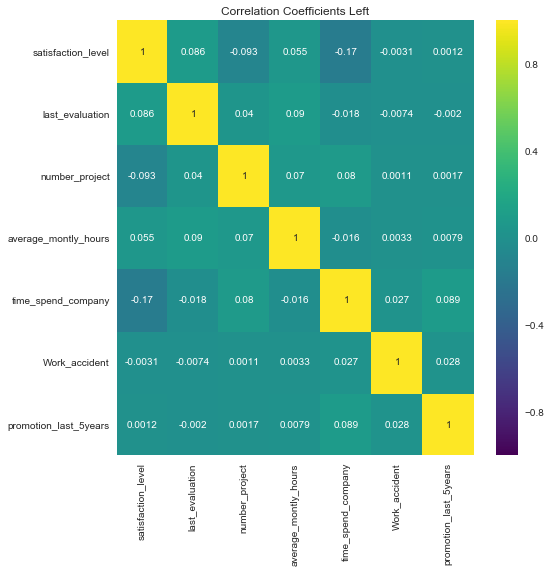

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df_hr_not_left.drop(['sales', 'left'], axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Coefficients Left')

# Exploring wrt *satisfaction_level*

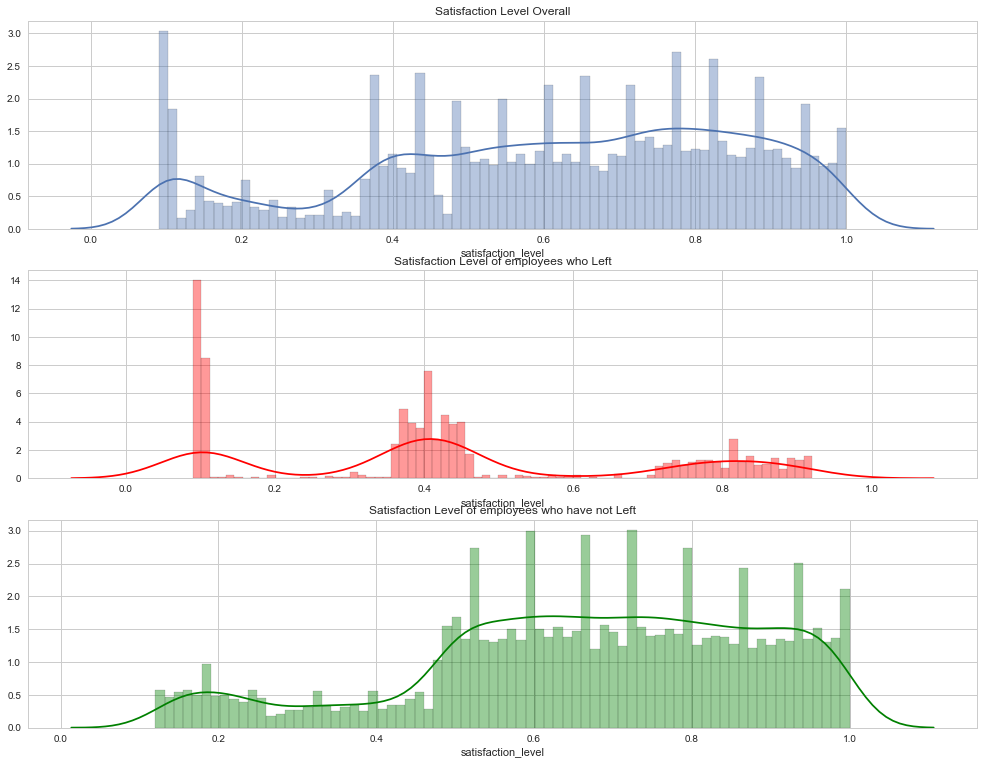

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(17,13))
sns.distplot(df_hr['satisfaction_level'], bins=75, ax=ax1)
ax1.set_title('Satisfaction Level Overall')

sns.distplot(df_hr_left['satisfaction_level'], bins=75, color='red', ax=ax2)
ax2.set_title('Satisfaction Level of employees who Left')

sns.distplot(df_hr_not_left['satisfaction_level'], bins=75, color='green', ax=ax3)
ax3.set_title('Satisfaction Level of employees who have not Left')

##### We can see that there is a pattern in the above graphs and the pattern is different for people who left and people who didn't leave.

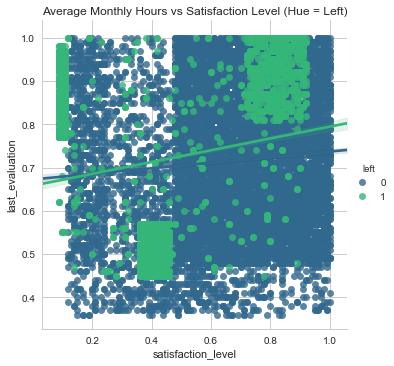

In [13]:
sns.lmplot(x='satisfaction_level', y = 'last_evaluation', hue='left', data=df_hr, palette='viridis')
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

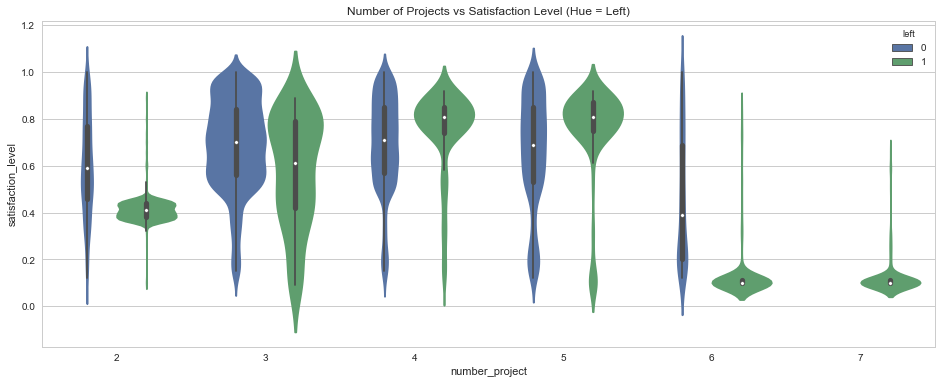

In [14]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='number_project', y='satisfaction_level', data=df_hr, hue='left')
plt.title('Number of Projects vs Satisfaction Level (Hue = Left)')

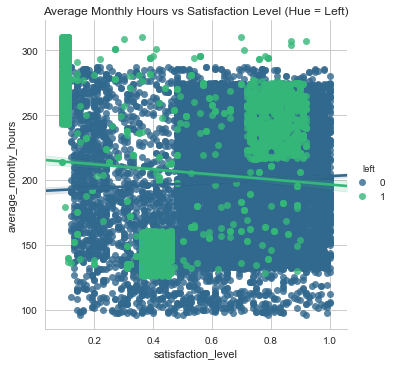

In [15]:
sns.lmplot(x='satisfaction_level', y = 'average_montly_hours', hue='left', data=df_hr, palette='viridis')
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

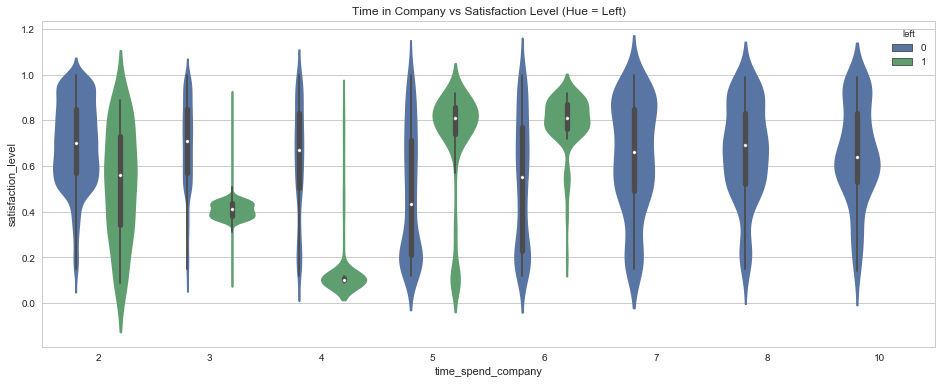

In [16]:
plt.figure(figsize = (16, 6))
sns.violinplot(x='time_spend_company', y='satisfaction_level', data=df_hr, hue='left')
plt.title('Time in Company vs Satisfaction Level (Hue = Left)')

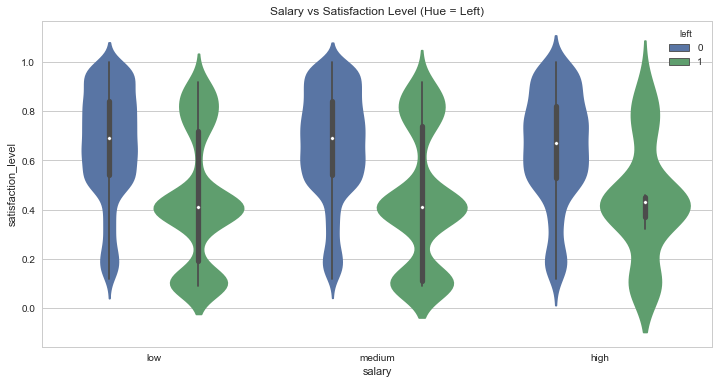

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='salary', y='satisfaction_level', data=pd.read_csv('Datasets/HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Satisfaction Level (Hue = Left)')

# Explore wrt *number_projects*

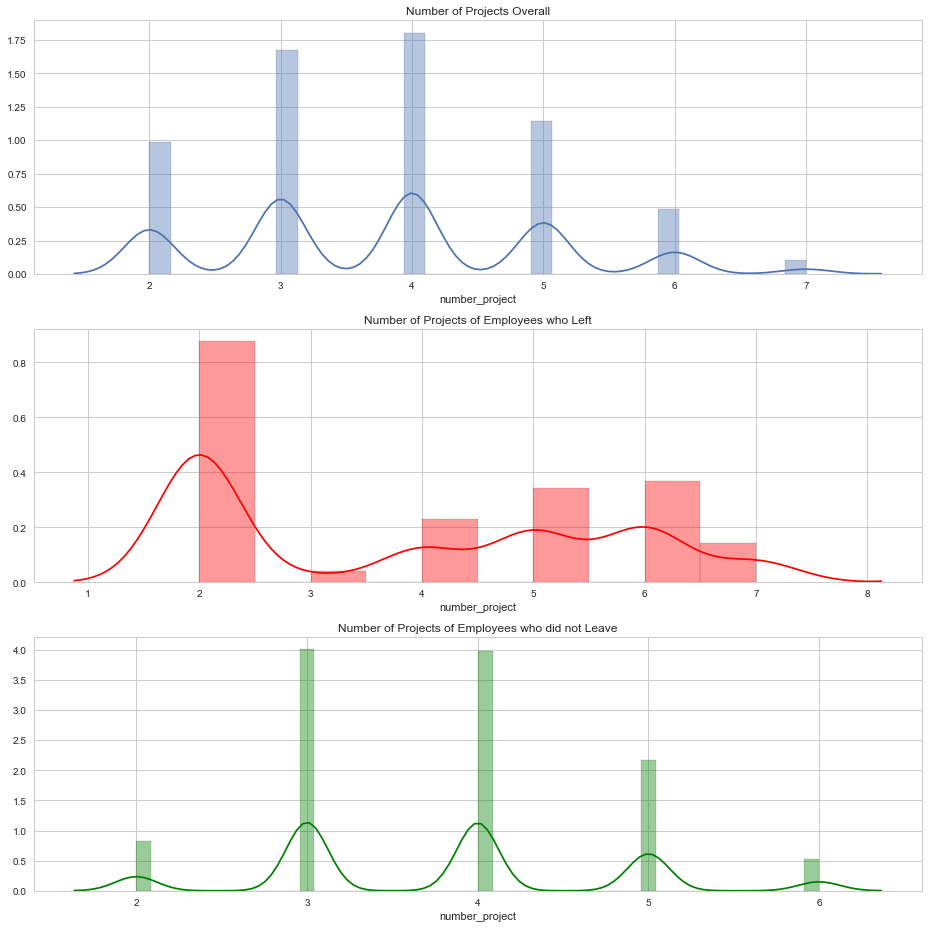

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['number_project'], ax=ax1)
ax1.set_title('Number of Projects Overall')

sns.distplot(df_hr_left['number_project'], color='red', ax=ax2)
ax2.set_title('Number of Projects of Employees who Left')

sns.distplot(df_hr_not_left['number_project'], color='green', ax=ax3)
ax3.set_title('Number of Projects of Employees who did not Leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for people who left and people who didn't leave.

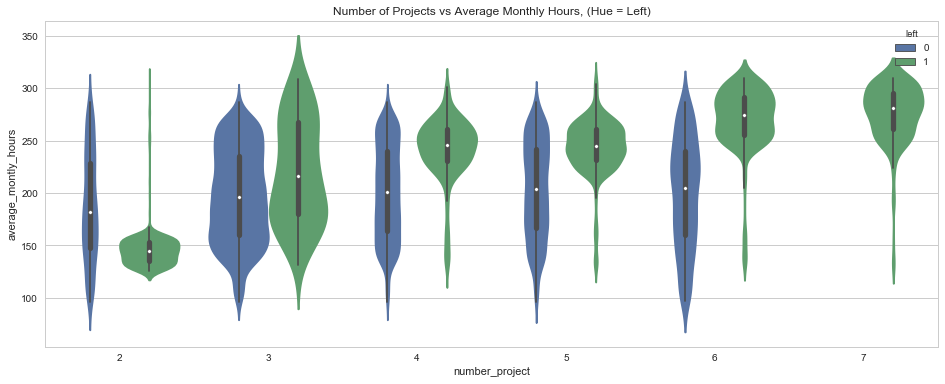

In [19]:
plt.figure(figsize=(16, 6))
sns.violinplot('number_project', 'average_montly_hours', data=df_hr, hue='left')
plt.title('Number of Projects vs Average Monthly Hours, (Hue = Left)')

# Explore wrt *average_montly_hours*

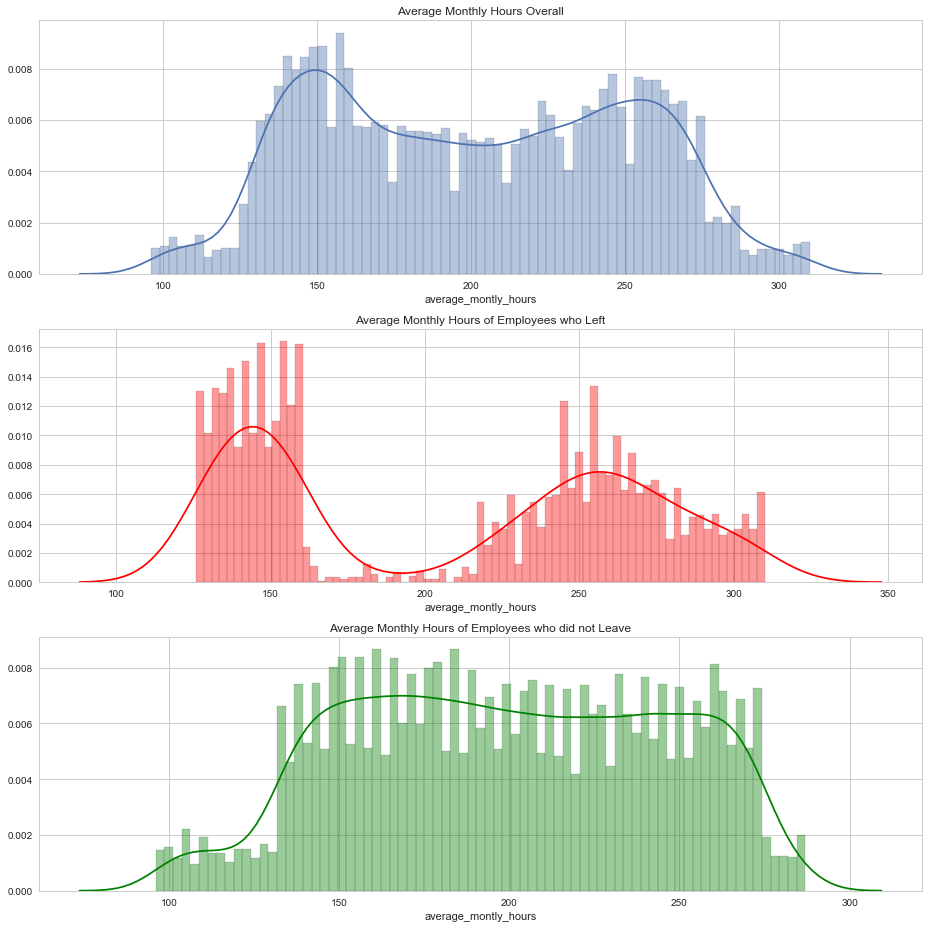

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['average_montly_hours'], bins=75, ax=ax1)
ax1.set_title('Average Monthly Hours Overall')

sns.distplot(df_hr_left['average_montly_hours'], bins=75, color='red', ax=ax2)
ax2.set_title('Average Monthly Hours of Employees who Left')

sns.distplot(df_hr_not_left['average_montly_hours'], bins=75, color='green', ax=ax3)
ax3.set_title('Average Monthly Hours of Employees who did not Leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for people who left and people who didn't leave.

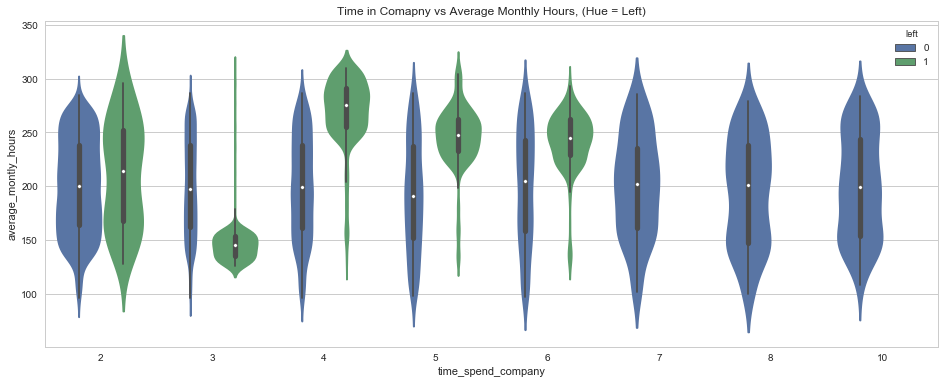

In [21]:
plt.figure(figsize=(16, 6))
sns.violinplot('time_spend_company', 'average_montly_hours', data=df_hr, hue='left')
plt.title('Time in Comapny vs Average Monthly Hours, (Hue = Left)')

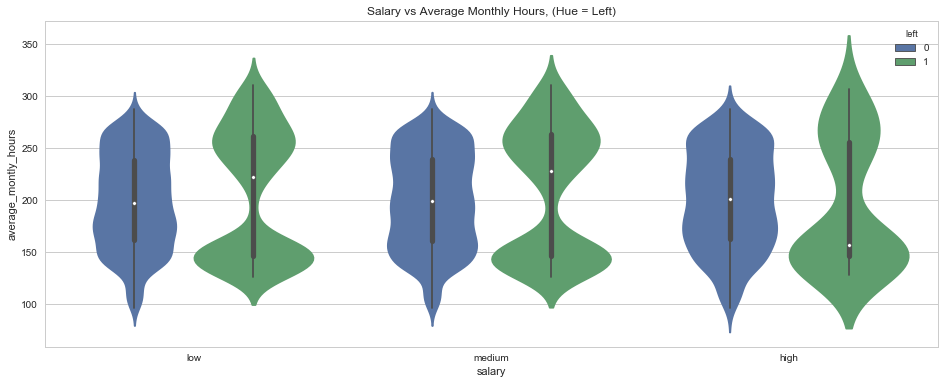

In [22]:
plt.figure(figsize=(16, 6))
sns.violinplot('salary', 'average_montly_hours', data=pd.read_csv('Datasets/HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Average Monthly Hours, (Hue = Left)')

# Explore wrt *time_spend_company*

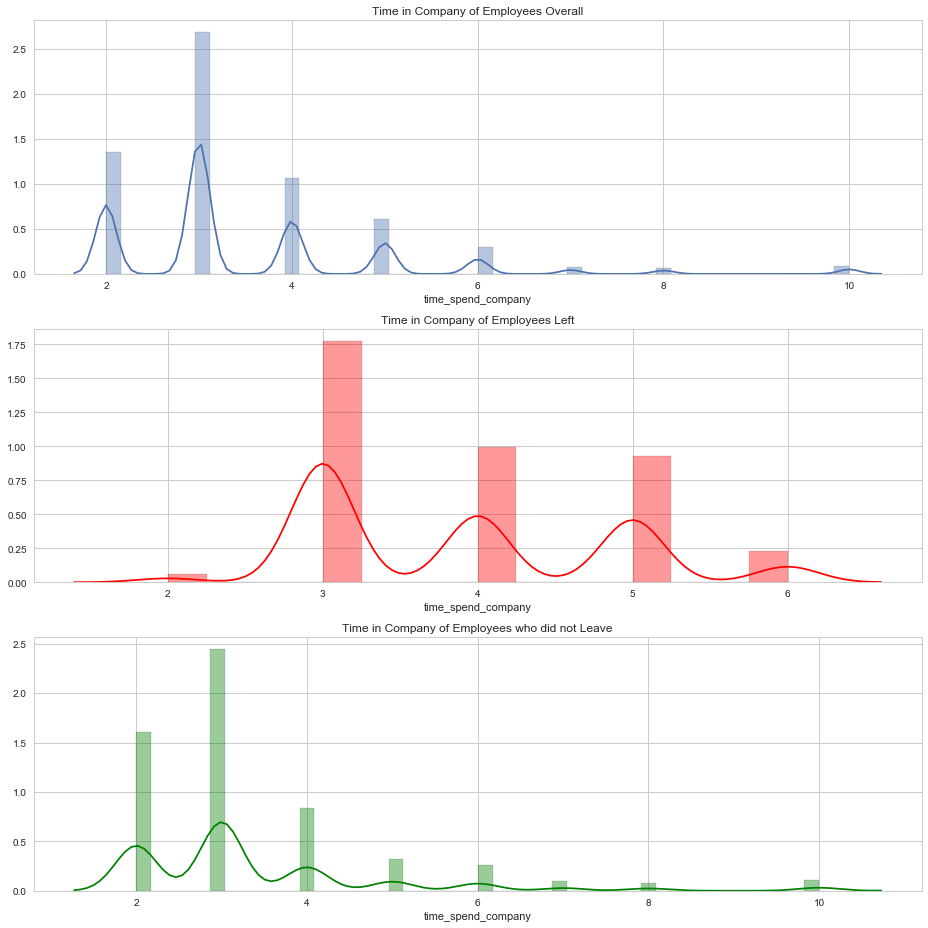

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['time_spend_company'], ax=ax1)
ax1.set_title('Time in Company of Employees Overall')

sns.distplot(df_hr_left['time_spend_company'], color='Red', ax=ax2)
ax2.set_title('Time in Company of Employees Left')

sns.distplot(df_hr_not_left['time_spend_company'], color='green', ax=ax3)
ax3.set_title('Time in Company of Employees who did not Leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for people who left and people who didn't leave.

# Exploring wrt *Work_accident*

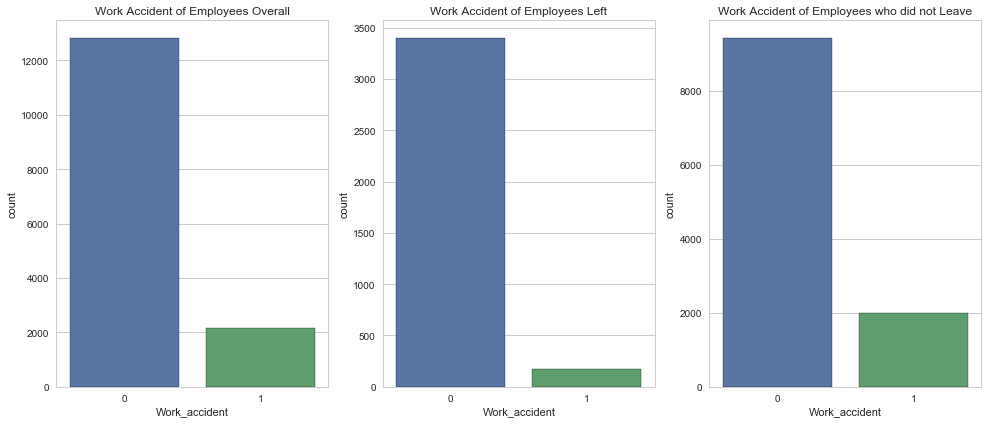

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,6))

sns.countplot(df_hr['Work_accident'], ax=ax1)
ax1.set_title('Work Accident of Employees Overall')

sns.countplot(df_hr_left['Work_accident'], ax=ax2)
ax2.set_title('Work Accident of Employees Left')

sns.countplot(df_hr_not_left['Work_accident'], ax=ax3)
ax3.set_title('Work Accident of Employees who did not Leave')

plt.tight_layout()


##### We can't see a distinct pattern in the above graphs for people who left and people who didn't leave.

# Exploring wrt *promotion_last_5years*

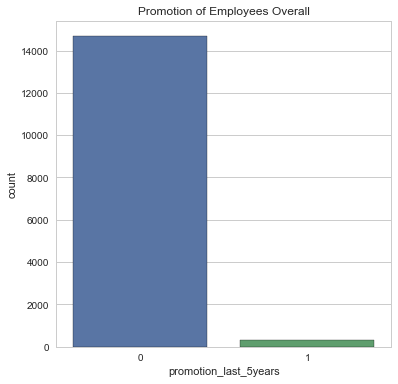

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(df_hr['promotion_last_5years'])
plt.title('Promotion of Employees Overall')

# Exploring wrt *sales*

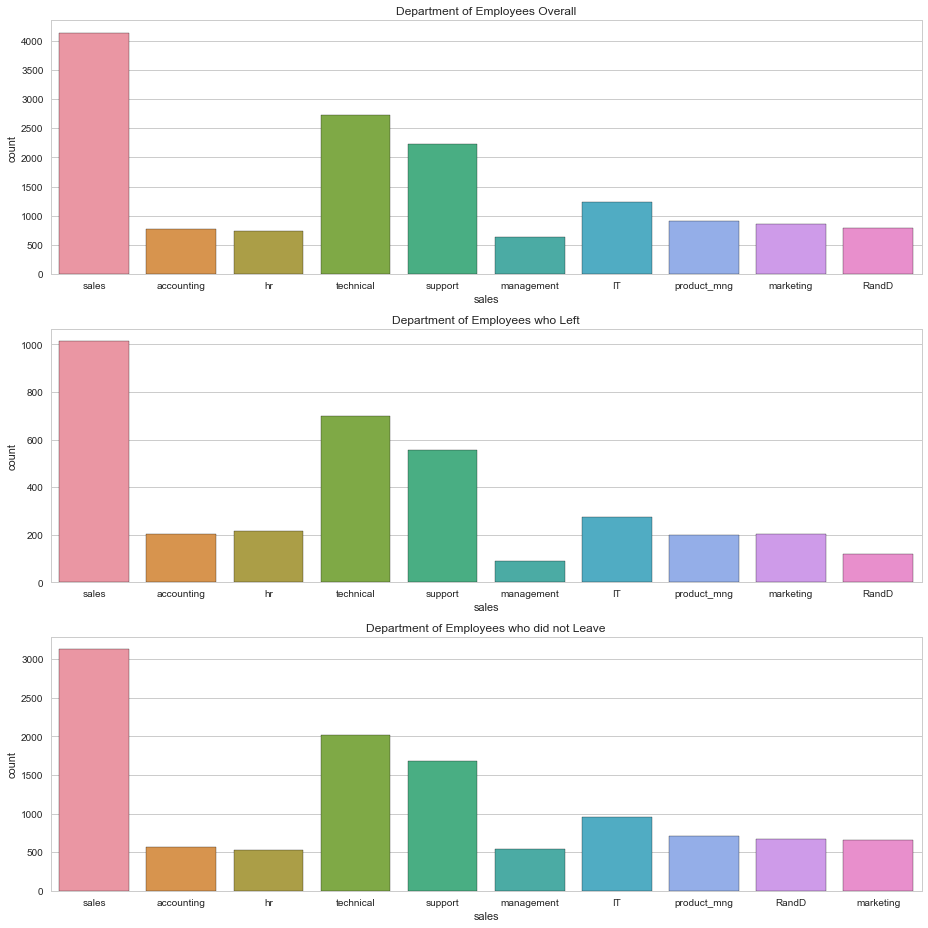

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))

sns.countplot(df_hr['sales'], ax=ax1)
ax1.set_title('Department of Employees Overall')

sns.countplot(df_hr_left['sales'], ax=ax2)
ax2.set_title('Department of Employees who Left')

sns.countplot(df_hr_not_left['sales'], ax=ax3)
ax3.set_title('Department of Employees who did not Leave')

plt.tight_layout()

##### We can't see a distinct pattern in the above graphs for people who left and people who didn't leave.

# Exploring wrt *salary*

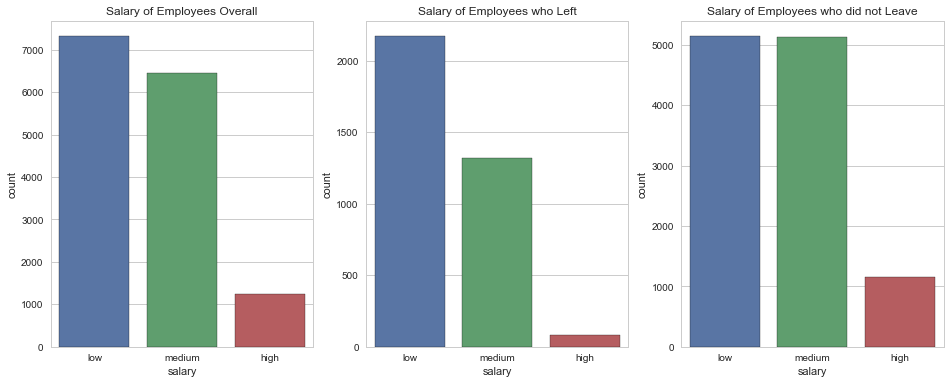

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
sns.countplot(pd.read_csv('Datasets/HR_comma_sep.csv')['salary'], ax=ax1)
ax1.set_title('Salary of Employees Overall')

sns.countplot(pd.read_csv('Datasets/HR_comma_sep.csv')['salary'][pd.read_csv('Datasets/HR_comma_sep.csv')['left'] == 1], ax=ax2)
ax2.set_title('Salary of Employees who Left')

sns.countplot(pd.read_csv('Datasets/HR_comma_sep.csv')['salary'][pd.read_csv('Datasets/HR_comma_sep.csv')['left'] == 0], ax=ax3)
ax3.set_title('Salary of Employees who did not Leave')

##### We can't see a distinct pattern in the above graphs for people who left and people who didn't leave.

# Explore wrt *last_evaluation*

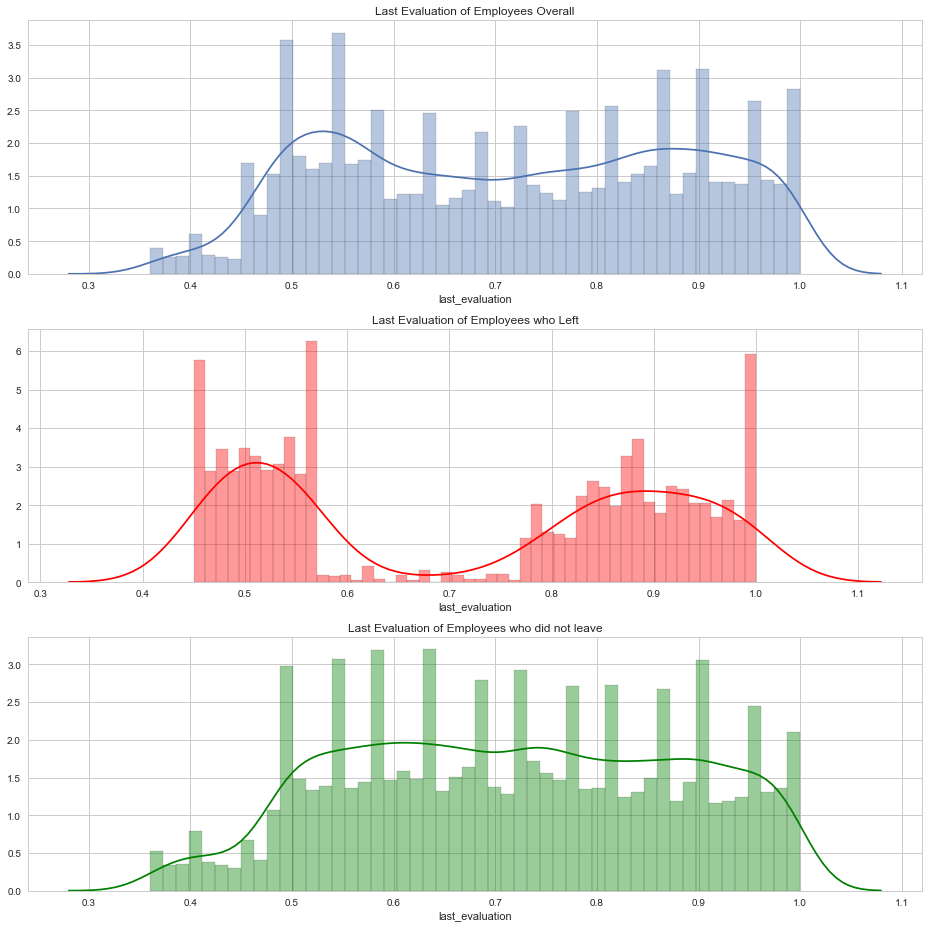

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13, 13))
sns.distplot(df_hr['last_evaluation'], bins=50, ax=ax1)
ax1.set_title('Last Evaluation of Employees Overall')

sns.distplot(df_hr_left['last_evaluation'], bins=50, color='red', ax=ax2)
ax2.set_title('Last Evaluation of Employees who Left')

sns.distplot(df_hr_not_left['last_evaluation'], bins=50, color='green', ax=ax3)
ax3.set_title('Last Evaluation of Employees who did not leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for people who left and people who didn't leave.

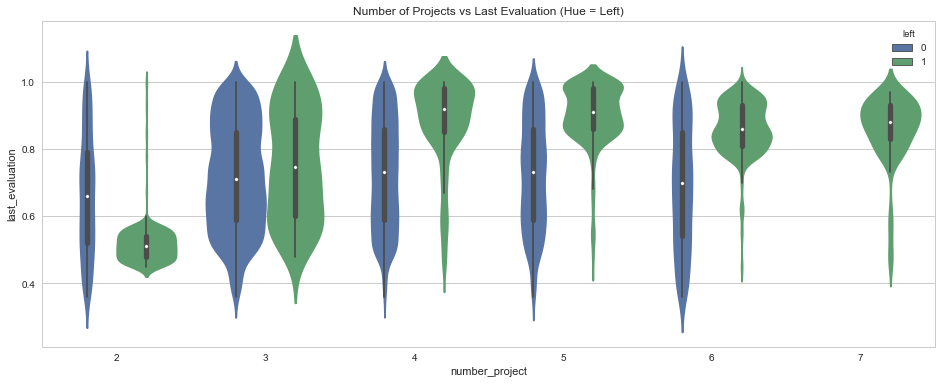

In [29]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='number_project', y='last_evaluation', data=df_hr, hue='left')
plt.title('Number of Projects vs Last Evaluation (Hue = Left)')

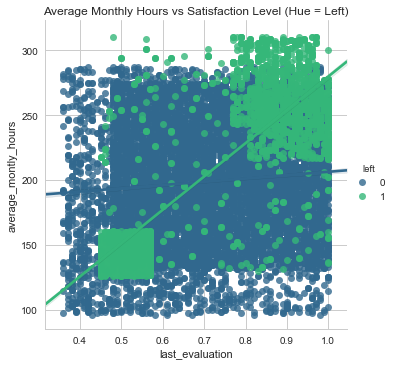

In [30]:
sns.lmplot(x='last_evaluation', y = 'average_montly_hours', hue='left', data=df_hr, palette='viridis')
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

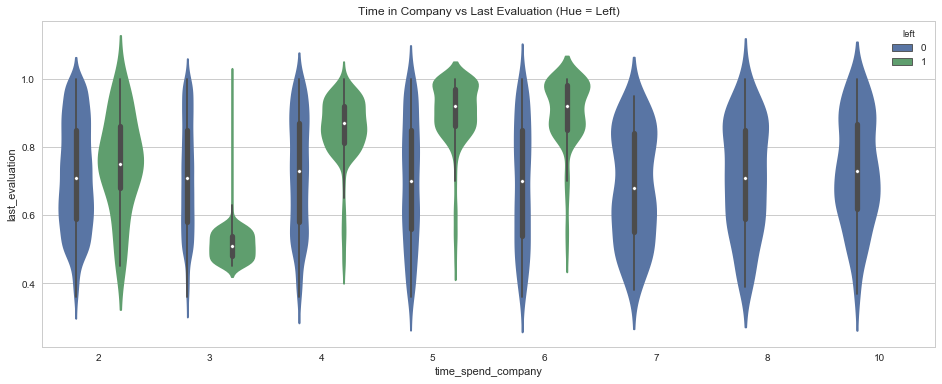

In [31]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='time_spend_company', y='last_evaluation', data=df_hr, hue='left')
plt.title('Time in Company vs Last Evaluation (Hue = Left)')

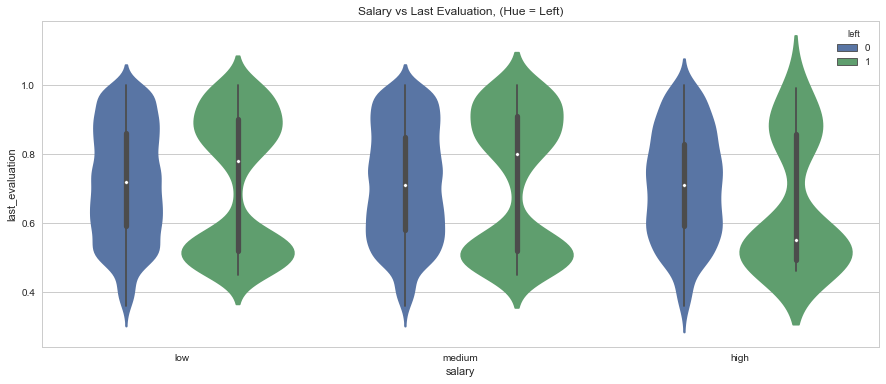

In [32]:
plt.figure(figsize=(15, 6))
sns.violinplot('salary', 'last_evaluation', data=pd.read_csv('Datasets/HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Last Evaluation, (Hue = Left)')

##### We have ommitted violin plots for variables whose countplot or distplot did now show any distinct pattern difference between employees who left and employees who didn't leave

# Filter out Important Employees

### Now we pick out employees who are important based on their *Evaluation*

In [33]:
len(df_hr_left[df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])

1893

In [34]:
len(df_hr_left)

3571

##### Here we see that more than half of the employees who left have been highly evaluated. Now lets plot graphs for these employees wrt to those variables which showed distinct pattern for people who left versus people who did not leave

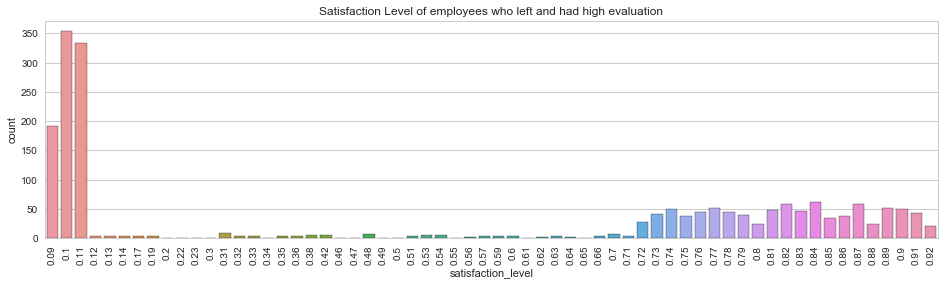

In [35]:
fig = plt.figure(figsize=(16, 4))
sns.countplot(df_hr_left['satisfaction_level'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.xticks(rotation=90)
plt.title('Satisfaction Level of employees who left and had high evaluation')

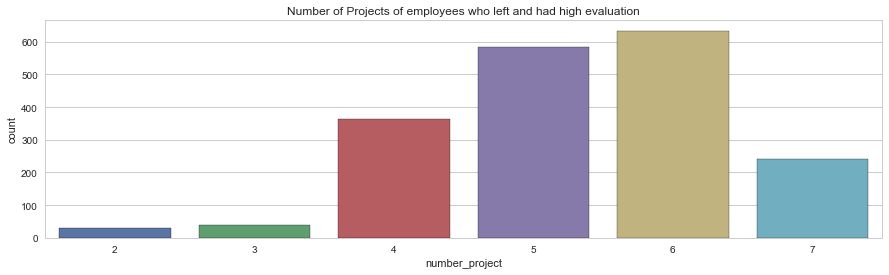

In [36]:
fig = plt.figure(figsize=(15, 4))
sns.countplot(df_hr_left['number_project'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.title('Number of Projects of employees who left and had high evaluation')

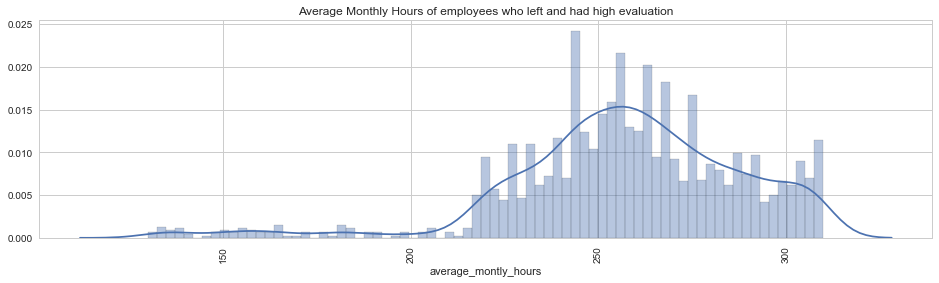

In [37]:
fig = plt.figure(figsize=(16, 4))
sns.distplot(df_hr_left['average_montly_hours'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()], bins=75)
plt.xticks(rotation=90)
plt.title('Average Monthly Hours of employees who left and had high evaluation')

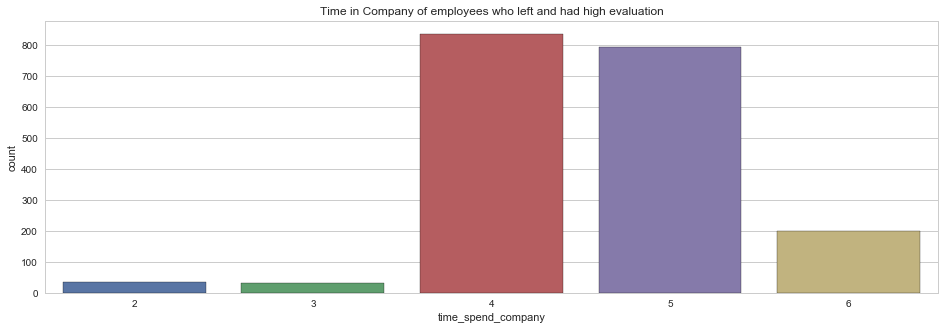

In [38]:
fig = plt.figure(figsize=(16, 5))
sns.countplot(df_hr_left['time_spend_company'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.title('Time in Company of employees who left and had high evaluation')

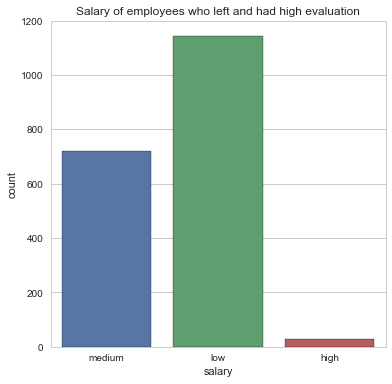

In [39]:
fig = plt.figure(figsize=(6, 6))
sns.countplot(df_hr['salary'][(df_hr['last_evaluation'] > df_hr['last_evaluation'].mean()) & (df_hr['left'] == 1)])
plt.title('Salary of employees who left and had high evaluation')

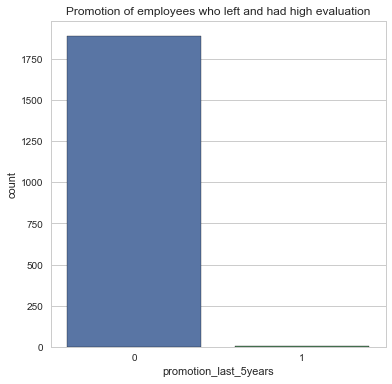

In [40]:
fig = plt.figure(figsize=(6, 6))
sns.countplot(df_hr_left['promotion_last_5years'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.title('Promotion of employees who left and had high evaluation')

##### So we can now see the problem with highly evaluated people who leave.
1. They have *lower* **satisfaction level**
2. They have *more* **number of projects**
3. They have *higher* **monthly hours**
4. They have also spent *more* **time in company**
5. They have *lower* **salary**
6. They have *not been* **promoted** in the last 5 years

# Macine Learning

### Let us find out the most important features using SelectKBest, a univariate feature selection method

In [41]:
map_salary = {'low': 0, 'medium': 1, 'high': 2}
df_hr.replace({'salary': map_salary}, inplace=True)

In [42]:
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(k='all')

In [43]:
from sklearn.preprocessing import scale

In [44]:
df_hr_shuffle = df_hr.sample(frac=1, random_state=45)
X = df_hr_shuffle.drop(['sales', 'left'], axis=1)
y = df_hr_shuffle['left']

In [45]:
X = scale(X)

In [46]:
model_skb = skb.fit(X, y)

In [47]:
feature_and_score = pd.DataFrame(data=model_skb.scores_, 
                                 index=df_hr_shuffle.drop(['sales', 'left'], axis=1).columns, 
                                 columns=['ANOVA F-value'])

In [48]:
feature_and_score = feature_and_score.sort_values(by='ANOVA F-value', axis=0, ascending=False)

In [49]:
feature_and_score

,ANOVA F-value
satisfaction_level,2663.881285
salary,383.461236
Work_accident,367.328044
time_spend_company,321.277313
average_montly_hours,76.601963
promotion_last_5years,57.474523
number_project,8.490559
last_evaluation,0.646805


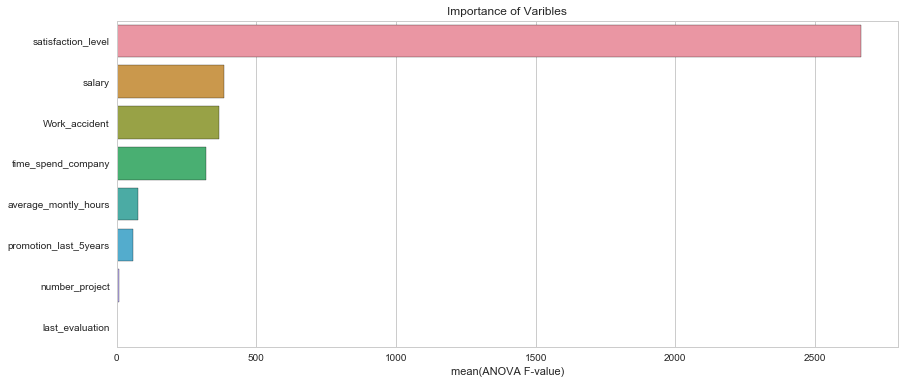

In [50]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='ANOVA F-value', y=feature_and_score.index, data=feature_and_score)
plt.title('Importance of Varibles')

### Let us find out the most important features using SelectKBest, a univariate feature selection method for highly evaluated employees

In [51]:
df_hr_high_eval = df_hr[df_hr['last_evaluation'] > df_hr['last_evaluation'].mean()]

In [52]:
df_hr_shuffle = df_hr_high_eval.sample(frac=1, random_state=45)
X_1 = df_hr_shuffle.drop(['sales', 'left', 'last_evaluation'], axis=1)
y_1 = df_hr_shuffle['left']

In [53]:
X_1 = scale(X_1)

In [54]:
model_skb_1 = skb.fit(X_1, y_1)

In [55]:
feature_and_score_high_eval = pd.DataFrame(data=model_skb_1.scores_, 
                                           index=df_hr_shuffle.drop(['sales', 'left', 'last_evaluation'], axis=1).columns, 
                                           columns=['ANOVA F-value'])

In [56]:
feature_and_score_high_eval = feature_and_score_high_eval.sort_values(by='ANOVA F-value', axis=0, ascending=False)

In [57]:
feature_and_score_high_eval

,ANOVA F-value
number_project,3224.899889
average_montly_hours,2383.689489
satisfaction_level,1008.854015
time_spend_company,995.544984
salary,203.146214
Work_accident,192.202128
promotion_last_5years,41.654703


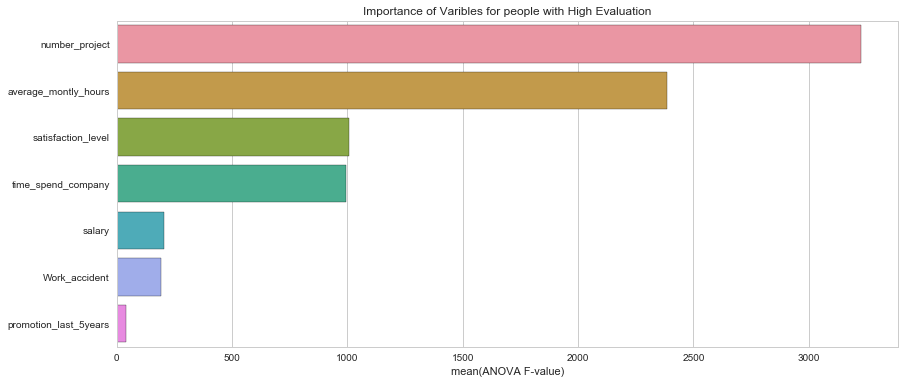

In [58]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='ANOVA F-value', y=feature_and_score_high_eval.index, data=feature_and_score_high_eval)
plt.title('Importance of Varibles for people with High Evaluation')

# Note:
##### The above done feature selection is univariate and not multivariate or tree-based and I will upgrade to those models once I have learned about it.

# Logistic Regression

In [3]:
%store -r